In [4]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [56]:
df1 = pd.read_csv("input/report_07-23.csv")
df2 = pd.read_csv("input/report_07-24.csv")
df3 = pd.read_csv("input/report_07-25.csv")
df4 = pd.read_csv("input/report_07-26.csv")
df5 = pd.read_csv("input/report_07-27.csv")
df6 = pd.read_csv("input/report_07-30.csv")
df7 = pd.read_csv("input/report_07-31.csv")
df = pd.concat([df1, df2, df3, df4, df5, df6, df7])
df.sample(10)

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
60877,2037,2018-07-30 19:43:10,77,Teatr Bagatela,20,Mały Płaszów,2018-07-30 19:41:00,6.352185e+18,6351558574044835862,STOPPING,2,7.0
56860,2069,2018-07-23 19:06:42,681,Teligi,3,Krowodrza Górka,2018-07-23 19:05:00,NaN,6351558574044444946,PLANNED,1,4.0
52867,1944,2018-07-25 17:53:58,435,Darwina,5,Krowodrza Górka,2018-07-25 17:53:00,6.352185e+18,6351558574044490514,STOPPING,0,3.0
43705,1628,2018-07-25 15:39:03,867,Bieńczycka,1,Salwator,2018-07-25 15:39:00,6.352185e+18,6351558574044371724,PREDICTED,0,9.0
19187,842,2018-07-24 09:30:58,576,Kapelanka,52,Czerwone Maki P+R,2018-07-24 09:29:00,6.352185e+18,6351558574045059588,STOPPING,1,26.0
40750,1539,2018-07-25 14:59:53,922,Łagiewniki,19,Borek Fałęcki,2018-07-25 14:59:00,6.352185e+18,6351558574044822285,STOPPING,0,15.0
71782,2434,2018-07-26 23:02:49,359,Stradom,52,Czerwone Maki P+R,2018-07-26 23:04:00,6.352185e+18,6351558574047661071,PREDICTED,0,22.0
63653,2139,2018-07-30 20:28:28,112,Stella-Sawickiego,52,Os.Piastów,2018-07-30 20:28:00,6.352185e+18,6351558574045069329,STOPPING,0,25.0
67407,522,2018-07-27 22:22:09,112,Stella-Sawickiego,9,Nowy Bieżanów P+R,2018-07-27 22:21:00,6.352185e+18,6351558574046448912,STOPPING,1,12.0
9550,424,2018-07-25 07:23:34,2859,Teatr Variété,14,Bronowice Małe,2018-07-25 07:21:00,6.352185e+18,6351558574044744451,STOPPING,2,20.0


In [5]:
#check specific trip
df[df.tripId == 6351558574044936456]

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
21231,764,2018-07-23 10:49:09,718,Witosa,24,Bronowice Małe,2018-07-23 10:49:00,6.352185e+18,6351558574044936456,STOPPING,0,2.0
21277,766,2018-07-23 10:49:48,3176,Kurdwanów P+R,24,Bronowice Małe,2018-07-23 10:48:00,NaN,6351558574044936456,PLANNED,1,1.0
21344,768,2018-07-23 10:50:50,715,Nowosądecka,24,Bronowice Małe,2018-07-23 10:50:00,6.352185e+18,6351558574044936456,STOPPING,0,3.0
21456,772,2018-07-23 10:52:27,716,Piaski Nowe,24,Bronowice Małe,2018-07-23 10:51:00,6.352185e+18,6351558574044936456,STOPPING,1,4.0
21564,777,2018-07-23 10:54:16,632,Dauna,24,Bronowice Małe,2018-07-23 10:53:00,6.352185e+18,6351558574044936456,STOPPING,1,5.0
21703,783,2018-07-23 10:56:23,630,Bieżanowska,24,Bronowice Małe,2018-07-23 10:55:00,6.352185e+18,6351558574044936456,STOPPING,1,6.0
21806,787,2018-07-23 10:57:54,624,Kabel,24,Bronowice Małe,2018-07-23 10:56:00,6.352185e+18,6351558574044936456,STOPPING,1,7.0
21922,792,2018-07-23 10:59:50,623,Dworcowa,24,Bronowice Małe,2018-07-23 10:58:00,6.352185e+18,6351558574044936456,STOPPING,1,8.0
22037,797,2018-07-23 11:01:40,621,Cmentarz Podgórski,24,Bronowice Małe,2018-07-23 11:00:00,6.352185e+18,6351558574044936456,STOPPING,1,9.0
22141,801,2018-07-23 11:03:11,3158,Podgórze SKA,24,Bronowice Małe,2018-07-23 11:02:00,6.352185e+18,6351558574044936456,STOPPING,1,10.0


In [7]:
#check how often delays happen
df.delay.value_counts(normalize=True)

0     0.426905
1     0.344715
2     0.123509
3     0.055987
4     0.025421
5     0.011410
6     0.004852
7     0.002657
8     0.001189
9     0.000867
10    0.000587
14    0.000503
12    0.000475
11    0.000350
13    0.000336
15    0.000154
16    0.000042
19    0.000028
18    0.000014
Name: delay, dtype: float64

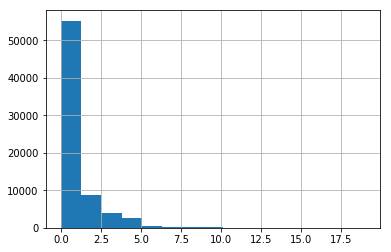

In [11]:
df.delay.hist(bins=15);

In [61]:
df.delay.describe()

count    505552.000000
mean          1.004029
std           1.310555
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          19.000000
Name: delay, dtype: float64

In [62]:
#use seconds instead of minutes in delay to get better accuracy
df['delay_secs'] = df['delay'] * 60
df.delay_secs.sample(5)

65768     0
48078    60
53503    60
27476     0
55863     0
Name: delay_secs, dtype: int64

In [63]:
#change string 'direction' to numerical value
df['direction_cat'] = df.direction.factorize()[0]
df.direction_cat.sample(5)

36172    14
12949    12
38822    11
47241     9
11705    11
Name: direction_cat, dtype: int64

In [64]:
#fill in missing valus in vehicleId
df.vehicleId.fillna(-1, inplace=True) #inplace - no need to "=" to a new value 
df.vehicleId.sample(5)

62574   -1.000000e+00
55082    6.352185e+18
41500    6.352185e+18
12981    6.352185e+18
61100    6.352185e+18
Name: vehicleId, dtype: float64

In [65]:
#fill in missing valus in seq_num
df.seq_num.fillna(-1, inplace=True)
df.seq_num.sample(5)

49387     9.0
25696     9.0
20271    23.0
30268    -1.0
28125    29.0
Name: seq_num, dtype: float64

In [66]:
#feature engineering
def gen_id_num_direction(x):
    return '{} {}'.format(x['number'], x['direction'])
    
df['number_direction_id'] = df.apply(gen_id_num_direction, axis=1).factorize()[0]

def gen_id_stop_direction(x):
    return '{} {}'.format(x['stop'], x['direction'])

df['stop_direction_id'] = df.apply(gen_id_stop_direction, axis=1).factorize()[0]

In [69]:
#map plannedTime to datetime
df.plannedTime = pd.to_datetime(df.plannedTime)
df.plannedTime.sample(5)

17322   2018-07-26 09:08:00
50221   2018-07-26 17:11:00
52889   2018-07-30 17:44:00
32601   2018-07-24 12:52:00
21628   2018-07-24 10:06:00
Name: plannedTime, dtype: datetime64[ns]

In [67]:
feats = [
         'number', 
         'stop', 
         'direction_cat', 
         'vehicleId', 
         'seq_num',
        # 'number_direction_id', 
         #'stop_direction_id'
        ]
X = df[feats].values
y = df['delay_secs'].values

model = DecisionTreeRegressor(max_depth=10)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')

np.mean(scores), np.std(scores)

(-47.014926127692945, 0.47580732939129045)

In [68]:
#Random Forest
model2 = RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=8)
scores2 = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')

np.mean(scores2), np.std(scores2)

(-47.00992135376175, 0.4771328033409431)

number_direction_id and stop_direction_id actually made out model worse 
so we commented them out